<a href="https://colab.research.google.com/github/juluo1988/JuluoAkemteu/blob/main/projet_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers, models, initializers


In [ ]:
# 1) Import de l’API haut-niveau Keras intégrée à TensorFlow
from tensorflow.keras.datasets import cifar10

In [ ]:
print(type(cifar10.load_data()))

<class 'tuple'>


In [ ]:
#2) La base de données est répartie en des données d’entrainement et des données de test.
#Formez les deux sous-ensembles de données x_train et x_test correspondant respectivement aux données d’entrainement et de test.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [ ]:
#3) Vérifiez la dimension des données d’entrainement et de test, le nombre de classes et le nombre d’échantillons par classe.

# Dimensions des jeux d'images
print("Dimensions des données d’entrainement et de test")
print(f"  x_train : {x_train.shape}")   # (50000, 32, 32, 3)
print(f"  x_test  : {x_test.shape}")    # (10000, 32, 32, 3)\n")

# Nombre de classes distinctes
classes = np.unique(y_train)
print("Nombre de classes :", len(classes))

# Effectifs par classe (jeu d'entraînement)
unique, counts = np.unique(y_train, return_counts=True)
print("Échantillons par classe :")
for cls, cnt in zip(unique, counts):
    print(f"  Classe {cls} : {cnt} images")

Dimensions des données d’entrainement et de test
  x_train : (50000, 32, 32, 3)
  x_test  : (10000, 32, 32, 3)
Nombre de classes : 10
Échantillons par classe :
  Classe 0 : 5000 images
  Classe 1 : 5000 images
  Classe 2 : 5000 images
  Classe 3 : 5000 images
  Classe 4 : 5000 images
  Classe 5 : 5000 images
  Classe 6 : 5000 images
  Classe 7 : 5000 images
  Classe 8 : 5000 images
  Classe 9 : 5000 images


/tmp/ipython-input-2982197470.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Classe {int(y_train[idx])}", fontsize=9)


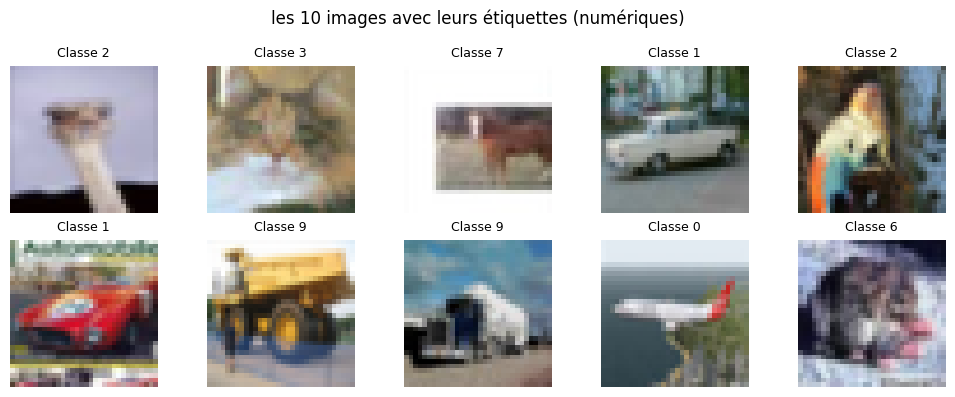

In [ ]:
#4) Affichez une dizaine d’échantillons de la base de données


indices = np.random.choice(len(x_train), 10, replace=False)

plt.figure(figsize=(10, 4))
for i, idx in enumerate(indices, 1):
    plt.subplot(2, 5, i)
    plt.imshow(x_train[idx])
    plt.title(f"Classe {int(y_train[idx])}", fontsize=9)
    plt.axis('off')

plt.suptitle("les 10 images avec leurs étiquettes (numériques)")
plt.tight_layout()
plt.show()


In [ ]:
#5) Réalisez une standardisation des deux sous-ensembles des données (normalisation des valeurs des pixels)

# # Normalisation simple des pixels
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0


6)Construisez une réseau de neurone convolutif (CNN) ayant l’architecture suivante :
- Utilisez trois filtres (couches de convolution) de dimension 3 qui progressent selon les couches selon : 32, puis 64, puis 128.
- Utilisez une normalisation par Batch après chaque couche de convolution et un maxPooloing de taille 2
- Utilisez la fonction d’activation relu et un padding=’same’.
- Utilisez ensuite le réseau intégralement connecté, constitué d’une couche dense de taille 1024
- Utilisez également un dropout avec un taux d’extinction de 20%

In [ ]:

def build_cifar10_cnn(input_shape=(32, 32, 3), n_classes=10):

    inputs = layers.Input(shape=input_shape, name="img")

    # 1 er filtre: couche 32
    x = layers.Conv2D(32, kernel_size=3, padding='same',
                      activation='relu', name='conv32')(inputs)
    x = layers.BatchNormalization(name='bn32')(x)
    x = layers.MaxPooling2D(pool_size=2, name='pool32')(x)

    # 2 ème filtre: couche 64
    x = layers.Conv2D(64, kernel_size=3, padding='same',
                      activation='relu', name='conv64')(x)
    x = layers.BatchNormalization(name='bn64')(x)
    x = layers.MaxPooling2D(pool_size=2, name='pool64')(x)

    # 3 ème filtre: couche 128
    x = layers.Conv2D(128, kernel_size=3, padding='same',
                      activation='relu', name='conv128')(x)
    x = layers.BatchNormalization(name='bn128')(x)
    x = layers.MaxPooling2D(pool_size=2, name='pool128')(x)

    #Passage au réseau entièrement connecté
    x = layers.Flatten(name='flatten')(x)                # aplatissement
    x = layers.Dense(1024, activation='relu',
                     name='dense1024')(x)                # dense 1024
    x = layers.Dropout(0.20, name='dropout_20')(x)       # dropout 20 %

    outputs = layers.Dense(n_classes, activation='softmax',
                           name='predictions')(x)

    return models.Model(inputs, outputs, name='CNN_CIFAR10')

# Construction du modèle
cnn_model = build_cifar10_cnn()


In [ ]:
#Affichez le sommaire du modèle 1

cnn_model.summary()

Model: "CNN_CIFAR10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ img (InputLayer)                │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv32 (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn32 (BatchNormalization)       │ (None, 32, 32, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool32 (MaxPooling2D)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv64 (Conv2D)                 │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn64 (BatchNormalization)       │ (None, 16, 16, 64)     │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool64 (MaxPooling2D)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv128 (Conv2D)                │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bn128 (BatchNormalization)      │ (None, 8, 8, 128)      │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool128 (MaxPooling2D)          │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1024 (Dense)               │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,202,570 (8.40 MB)

 Trainable params: 2,202,122 (8.40 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
# 8) En utilisant l’optimisation adam, entrainez le CNN sur le jeu de données d’entrainement de CIFAR10 pendant 50 époques.
#La métrique utilisée étant la valeur de l’accuracy.

In [ ]:

# Encodage one-hot des étiquettes
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat  = to_categorical(y_test,  num_classes=10)
# ------------------------------------------------------------------
# 1) Compilation du modèle
# ------------------------------------------------------------------
#   • Adam est un optimiseur adaptatif très robuste pour les CNN.
#   • La perte 'categorical_crossentropy' est le choix standard
#     lorsque la sortie est un soft-max à 10 classes.
#   • On surveille l'accuracy (= proportion de prédictions correctes).
cnn_model.compile(
    optimizer=Adam(),                # tu peux préciser le learning-rate, ex: Adam(1e-3)
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ------------------------------------------------------------------
# 2) Apprentissage (50 époques)
# ------------------------------------------------------------------
#   • batch_size=128 est un bon compromis vitesse/mémoire sur GPU ; adapte-le
#     si tu n’as qu’un CPU ou peu de RAM vidéo.
#   • validation_split=0.1 consacre 10 % du train au suivi validation
#     (≃ 5000 images). Tu peux aussi créer x_val/y_val séparément.
history_cnn = cnn_model.fit(
    x_train, y_train_cat,
    epochs=50,
    batch_size=128,
    validation_split=0.10,   # 90 % train, 10 % validation
    shuffle=True,            # mélange les mini-batchs à chaque époque
    verbose=2                # affichage condensé ; passe à 1 si tu veux la barre de progression
)


Epoch 1/50
352/352 - 149s - 422ms/step - accuracy: 0.5221 - loss: 1.4237 - val_accuracy: 0.3414 - val_loss: 2.1507
Epoch 2/50
352/352 - 194s - 551ms/step - accuracy: 0.6863 - loss: 0.8930 - val_accuracy: 0.6970 - val_loss: 0.8802
Epoch 3/50
352/352 - 140s - 397ms/step - accuracy: 0.7563 - loss: 0.6922 - val_accuracy: 0.6984 - val_loss: 0.8712
Epoch 4/50
352/352 - 142s - 403ms/step - accuracy: 0.8099 - loss: 0.5423 - val_accuracy: 0.7278 - val_loss: 0.7912
Epoch 5/50
352/352 - 141s - 402ms/step - accuracy: 0.8605 - loss: 0.3937 - val_accuracy: 0.7308 - val_loss: 0.8613
Epoch 6/50
352/352 - 143s - 405ms/step - accuracy: 0.9017 - loss: 0.2829 - val_accuracy: 0.7576 - val_loss: 0.8043
Epoch 7/50
352/352 - 135s - 384ms/step - accuracy: 0.9303 - loss: 0.2001 - val_accuracy: 0.7502 - val_loss: 0.9429
Epoch 8/50
352/352 - 134s - 381ms/step - accuracy: 0.9417 - loss: 0.1651 - val_accuracy: 0.7560 - val_loss: 0.9250
Epoch 9/50
352/352 - 149s - 424ms/step - accuracy: 0.9532 - loss: 0.1371 - val_a

9) Représentez la matrice de confusion sur les données de test. Commentez les résultats.

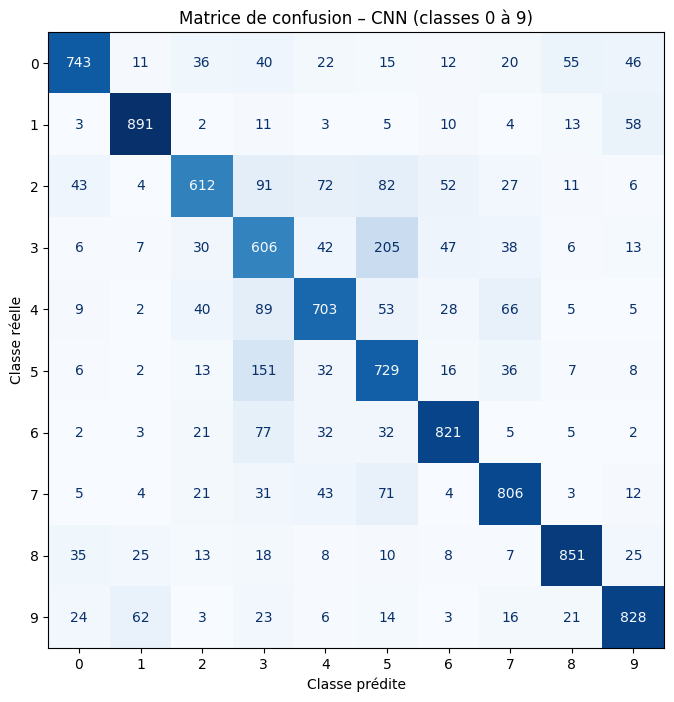

In [ ]:
# Prédictions
y_true = y_test.flatten()  # étiquettes vraies (ex. [6, 9, 2, ...])
y_pred = np.argmax(cnn_model.predict(x_test, verbose=0), axis=1)

# Matrice de confusion
cm = confusion_matrix(y_true, y_pred)

# Affichage (sans noms de classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("Matrice de confusion – CNN (classes 0 à 9)")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.show()

commentaire:
la diagonale principale est bien marquée, ce qui indique que la majorité des prédictions sont correctes.

Les classes les plus bien reconnues avec un bon pourcentage :
- Classe 1 : automobile → 891/1000.
- Classe 9 : truck → 828/1000.
- Classe 8 : ship → 851/1000.
- Classe 6 : frog → 821/1000.
- Classe 7 : horse → 806/1000.

on peut conclure que le réseau est particulièrement performant pour détecter des objets très distinctifs visuellement

Les classes avec erreurs visibles
- Classe 3 est confondue avec la classe 5 205 fois
Autres erreurs avec :
- Classe 2 est Confondue 91 fois avec cat
- Classe 5: Confondue 151 fois avec cat.
- Classe 4 est confondue 89 fois avec cat, 66 fois avec horse, 53 fois avec dog.

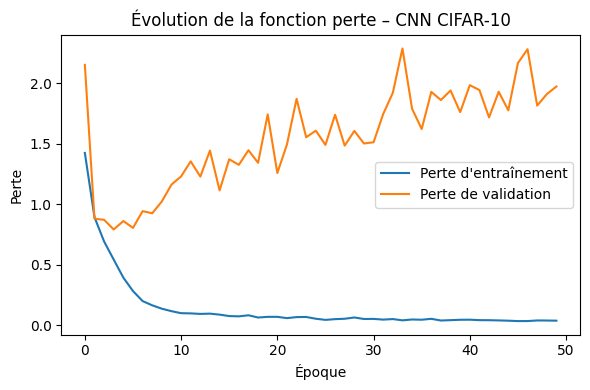

In [ ]:
#10- Représentez la courbe de variation de la fonction perte sur les données d’entrainement et de test.
train_loss = history_cnn.history['loss']
val_loss   = history_cnn.history['val_loss']

plt.figure(figsize=(6,4))
plt.plot(train_loss, label='Perte d\'entraînement')
plt.plot(val_loss,  label='Perte de validation')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.title('Évolution de la fonction perte – CNN CIFAR-10')
plt.legend(); plt.tight_layout(); plt.show()

11) Construisez un RNP dense constitué de 10 couches cachées, chacune avec 100 neurones. Utilisez l’initialisation de He et la fonction d’activation ELU.

In [ ]:


def build_dense_rnp(input_shape=(32, 32, 3), n_classes=10):
    """
    Construit un réseau entièrement connecté :
    - 10 couches cachées
    - 100 neurones chacune
    - Activation ELU
    - Initialisation de He (he_normal)
    """
    inputs = layers.Input(shape=input_shape)

    # Aplatissement de l'image 32×32×3 → 3072
    x = layers.Flatten()(inputs)

    # Initialisateur de He (adapté à ELU / ReLU-like)
    he_init = initializers.he_normal()

    # 10 couches Dense(100) avec ELU
    for i in range(10):
        x = layers.Dense(100,
                         activation='elu',
                         kernel_initializer=he_init,
                         name=f"dense_{i+1}")(x)

    # Couche de sortie soft-max (10 classes)
    outputs = layers.Dense(n_classes, activation='softmax',
                           name="predictions")(x)

    return models.Model(inputs, outputs, name="RNP_dense_10x100")

# Construction du modèle
rnp_model = build_dense_rnp()
rnp_model.summary()


Model: "RNP_dense_10x100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │       307,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 399,210 (1.52 MB)

 Trainable params: 399,210 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

12) En utilisant l’optimisation Nadam (learning_rate=5e-5), entrainez le RNP sur le jeu de données d’entrainement CIFAR10 pendant 50 époques. La métrique utilisée étant l’accuracy.

In [ ]:
# -------------------------------------------------------------------
# 1) Compilation du modèle avec Nadam (learning_rate = 5e-5)
# -------------------------------------------------------------------


rnp_model.compile(
    optimizer=Nadam(learning_rate=5e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# -------------------------------------------------------------------
# 2) Apprentissage – 50 époques
# -------------------------------------------------------------------
history_rnp = rnp_model.fit(
    x_train, y_train_cat,
    epochs=50,
    batch_size=256,          # ok sur CPU et GPU pour un MLP de 3 M params
    validation_split=0.10,   # 10 % du train comme validation
    shuffle=True,
    verbose=2                # 2 = log condensé ; 1 pour barre de progression
)


Epoch 1/50
176/176 - 11s - 62ms/step - accuracy: 0.2724 - loss: 2.0274 - val_accuracy: 0.3446 - val_loss: 1.8525
Epoch 2/50
176/176 - 3s - 19ms/step - accuracy: 0.3586 - loss: 1.7877 - val_accuracy: 0.3800 - val_loss: 1.7558
Epoch 3/50
176/176 - 5s - 29ms/step - accuracy: 0.3872 - loss: 1.7084 - val_accuracy: 0.4014 - val_loss: 1.6977
Epoch 4/50
176/176 - 6s - 36ms/step - accuracy: 0.4076 - loss: 1.6564 - val_accuracy: 0.4020 - val_loss: 1.6671
Epoch 5/50
176/176 - 3s - 19ms/step - accuracy: 0.4206 - loss: 1.6161 - val_accuracy: 0.4156 - val_loss: 1.6355
Epoch 6/50
176/176 - 5s - 29ms/step - accuracy: 0.4360 - loss: 1.5821 - val_accuracy: 0.4254 - val_loss: 1.6224
Epoch 7/50
176/176 - 4s - 25ms/step - accuracy: 0.4482 - loss: 1.5529 - val_accuracy: 0.4400 - val_loss: 1.5923
Epoch 8/50
176/176 - 3s - 18ms/step - accuracy: 0.4566 - loss: 1.5296 - val_accuracy: 0.4458 - val_loss: 1.5749
Epoch 9/50
176/176 - 5s - 30ms/step - accuracy: 0.4657 - loss: 1.5060 - val_accuracy: 0.4544 - val_loss

13) Représentez la matrice de confusion. Commentez les résultats


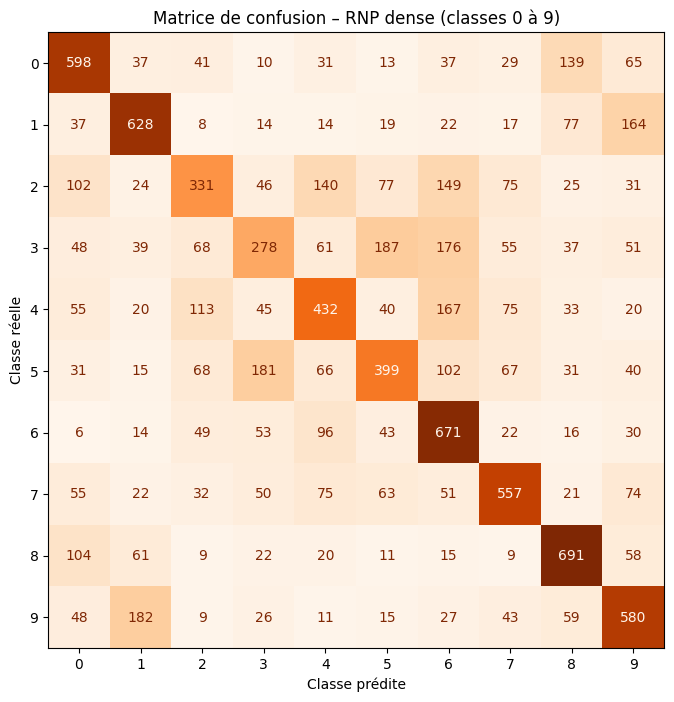

In [ ]:
# --- prédictions sur le jeu de test ---
y_true = y_test.flatten()                                # (10000,) entiers 0-9
y_pred = np.argmax(rnp_model.predict(x_test, verbose=0), axis=1)

# --- matrice de confusion brute ---
cm = confusion_matrix(y_true, y_pred)

# --- affichage sans noms de classes (0-9) ---
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap='Oranges', colorbar=False)
plt.title("Matrice de confusion – RNP dense (classes 0 à 9)")
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.show()



 Points positifs :
- La classe frog (6) est bien reconnue : 671 prédictions correctes. Sa forme et sa couleur très spécifiques facilitent la classification.

- La classe ship (8) est aussi bien identifiée (691/1000), probablement en raison de ses arrière-plans uniformes (eau, ciel).

- La classe automobile (1) atteint 628 bonnes prédictions, ce qui montre que certains objets artificiels sont bien appris.

# Confusions fréquentes :
- Chat (3) est fortement confondu avec :
  - Chien (5) → 187 erreurs
  - Cheval (7) → 176 erreurs
  - Oiseau (2) → 68 erreurs
- Oiseau (2) est mal reconnu :
Confondu avec chat, chien et cerf (4)
- Cerf (4) et cheval (7) sont souvent inversés :
- Truck (9) est souvent prédit comme automobile (1)

14) Comparez les deux modèles CNN et RNP obtenus et commentez les résultats.